# Climatology


Climatology of variables and Climatological Variance

In [1]:
# Importing packages
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import nc_time_axis
from dask.diagnostics import ProgressBar
import re
from xmovie import Movie
%matplotlib inline
import imageio

In [2]:
gridpath = ('/projects/SOCCOM/data/ESM4_PPE/archive/Richard.Slater/xanadu_esm4_20190304_mom6_ESM4_v1.0.3_rc1/GRID/ocean.static.nc')
grid = xr.open_dataset(gridpath)

In [3]:
ds_npp = xr.open_dataset('/projects/SOCCOM/saumyam/data_netcdf_files/Control_Full/intpp')
ds_tos = xr.open_dataset('/projects/SOCCOM/saumyam/data_netcdf_files/Control_Full/tos')
ds_sos = xr.open_dataset('/projects/SOCCOM/saumyam/data_netcdf_files/Control_Full/sos')
ds_mld = xr.open_dataset('/projects/SOCCOM/saumyam/data_netcdf_files/Control_Full/MLD_003')
ds_chlos = xr.open_dataset('/projects/SOCCOM/saumyam/data_netcdf_files/Control_Full/chlos')

In [5]:
npp_month_mean = npp_month.mean()

In [6]:
npp_month_var = npp_month.std() ** 2

In [7]:
def plot_gridlayout(groupby_obj, v_min, v_max, colormap='RdBu_r'):
    fig = plt.figure(figsize=(24,18))
    
    axes = []
    for i in range(12):
        axis = fig.add_subplot(4,3,i+1)
        axes.append(axis)

    for month in range(12):
        groupby_obj[month].plot(ax=axes[month],vmin=v_min,vmax=v_max,cmap=colormap)
    
    fig.tight_layout()
    plt.show()


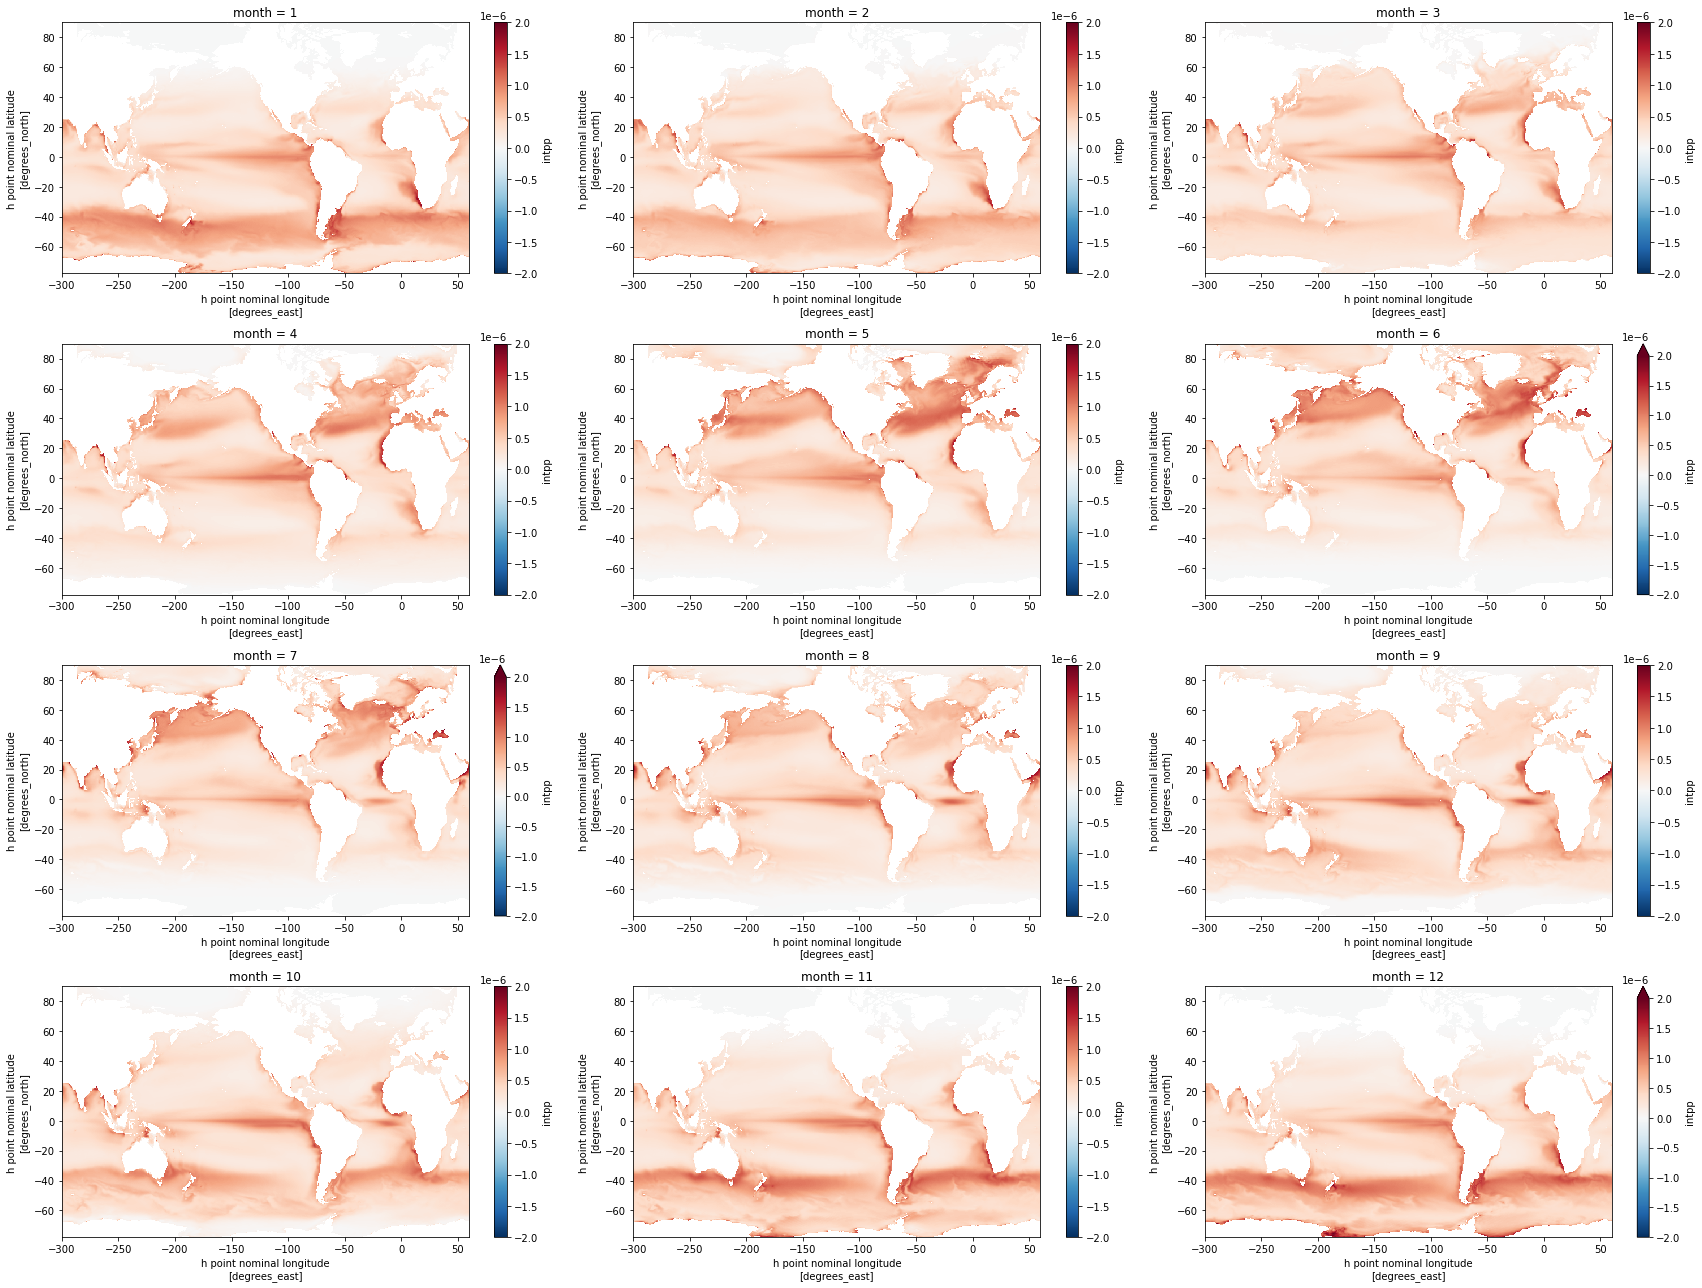

<Figure size 432x288 with 0 Axes>

In [8]:
plot_gridlayout(npp_month_mean,-2e-6,2e-6)
plt.savefig('/projects/SOCCOM/saumyam/Climatologies/NPP Climatology')

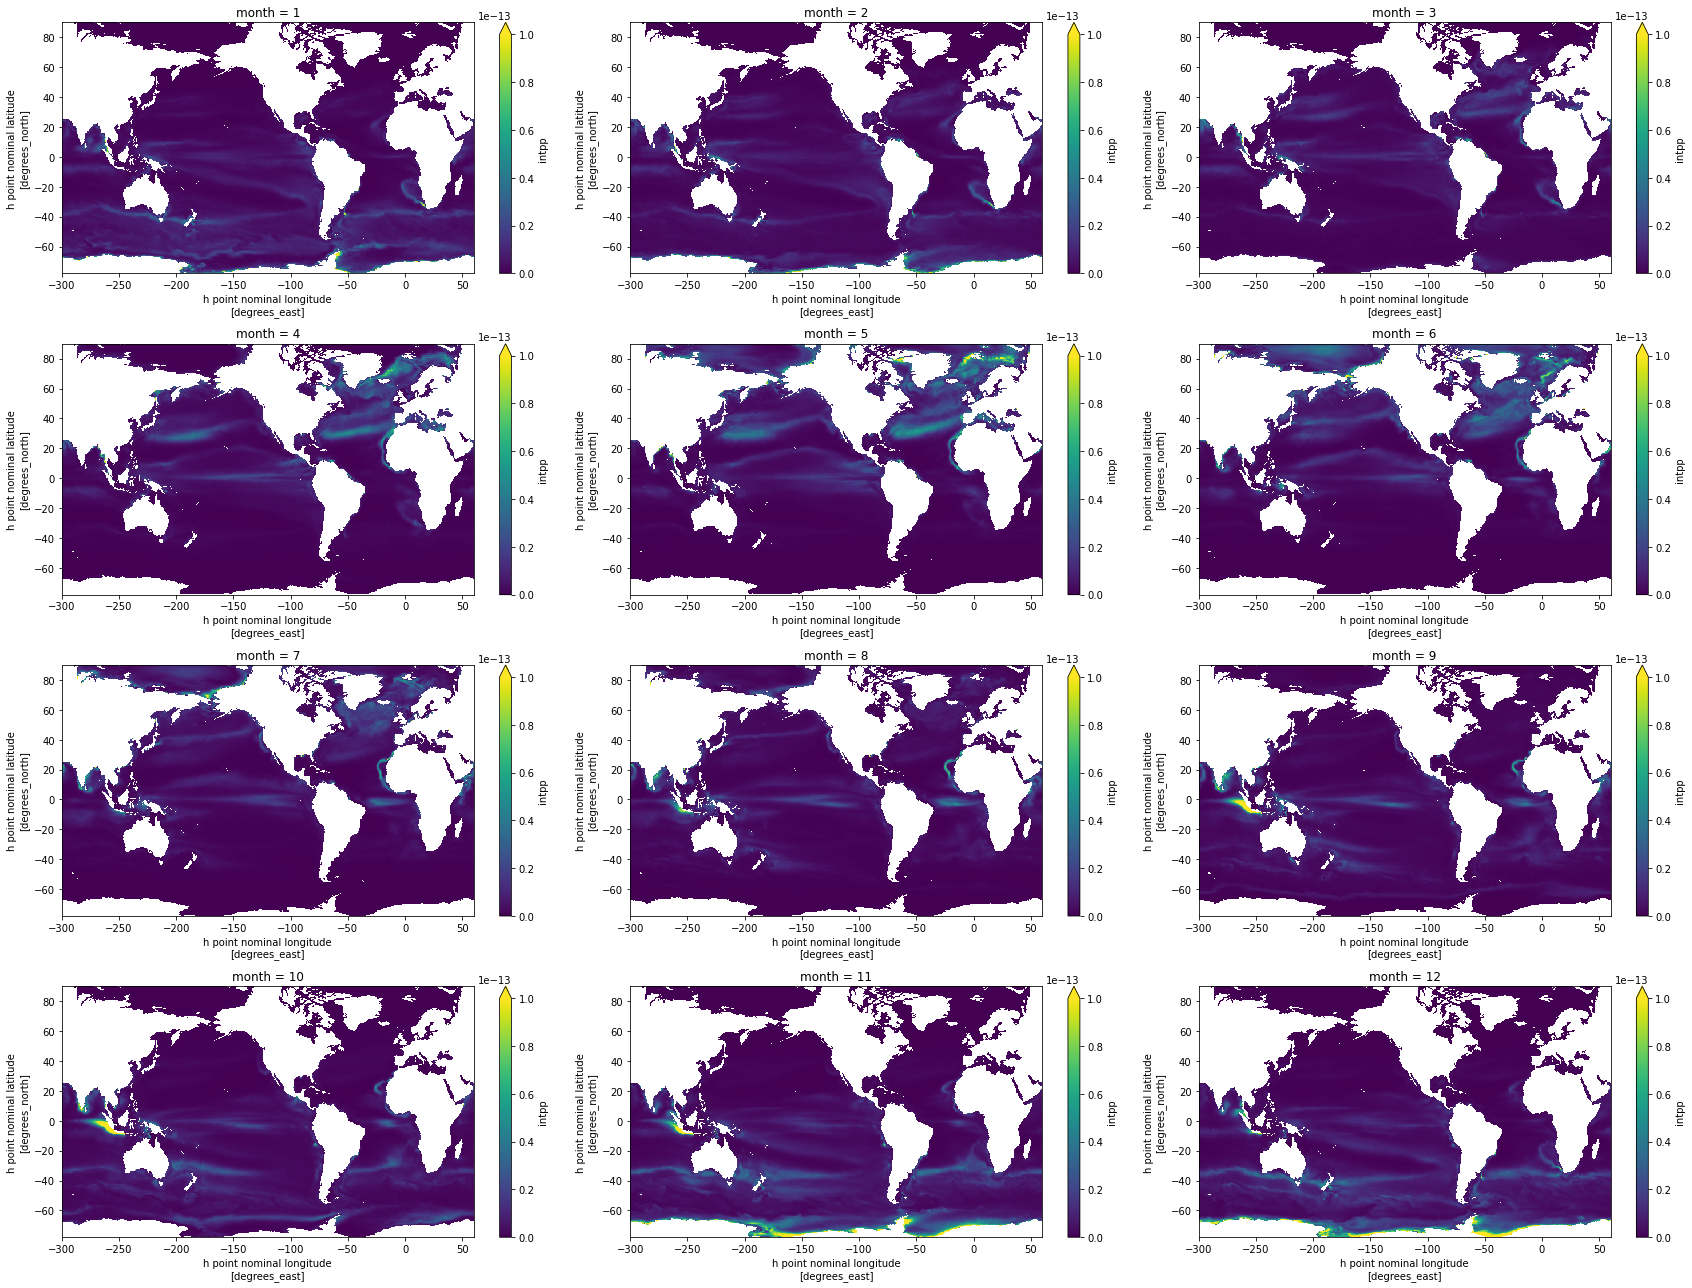

<Figure size 432x288 with 0 Axes>

In [9]:
plot_gridlayout(npp_month_var,0,1e-13,colormap='viridis')
plt.savefig('/projects/SOCCOM/saumyam/Climatologies/NPP Variance')

In [10]:
tos_month = ds_tos['tos'].groupby('time.month')
tos_month_mean = tos_month.mean()
tos_month_var = tos_month.std() ** 2

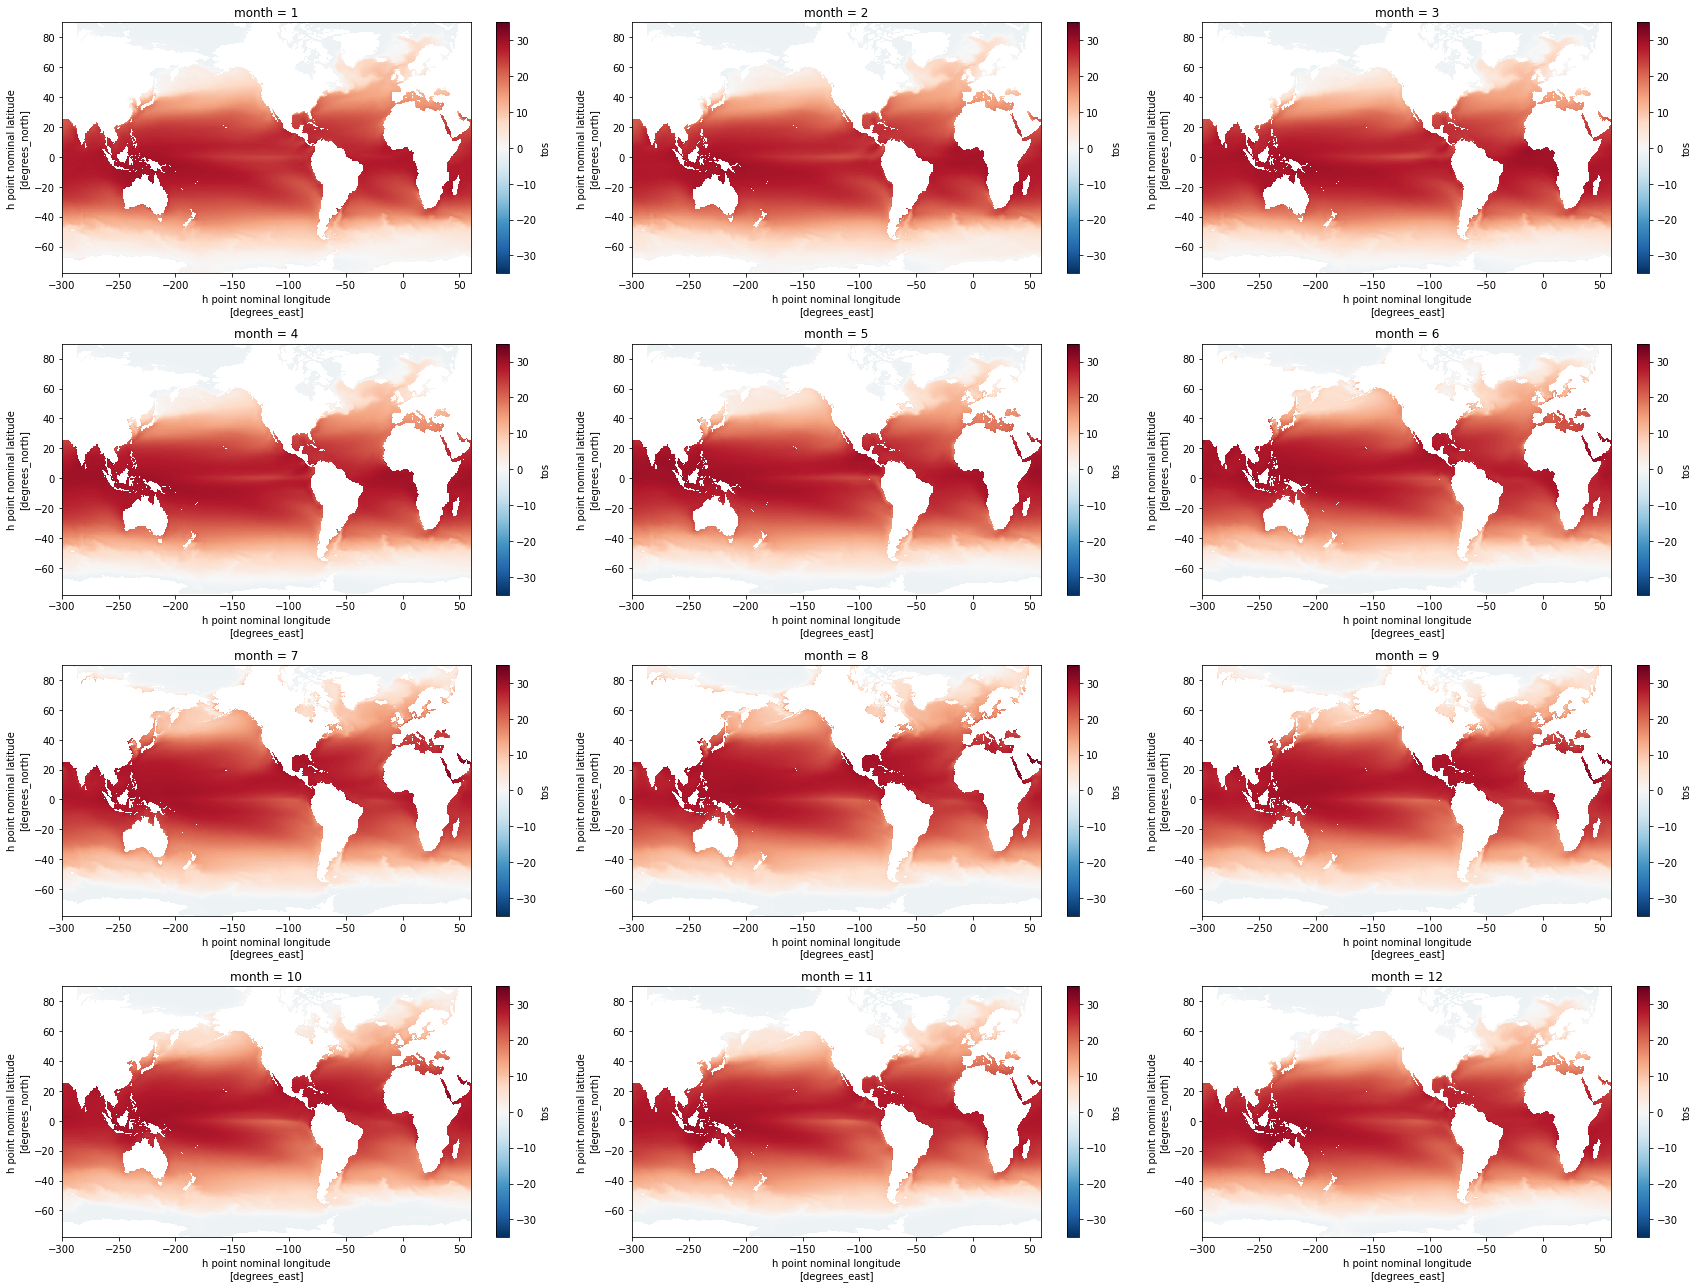

In [11]:
plot_gridlayout(tos_month_mean, -35, 35)
#plt.savefig('/home/saumyam/Climatologies/SST Climatology')

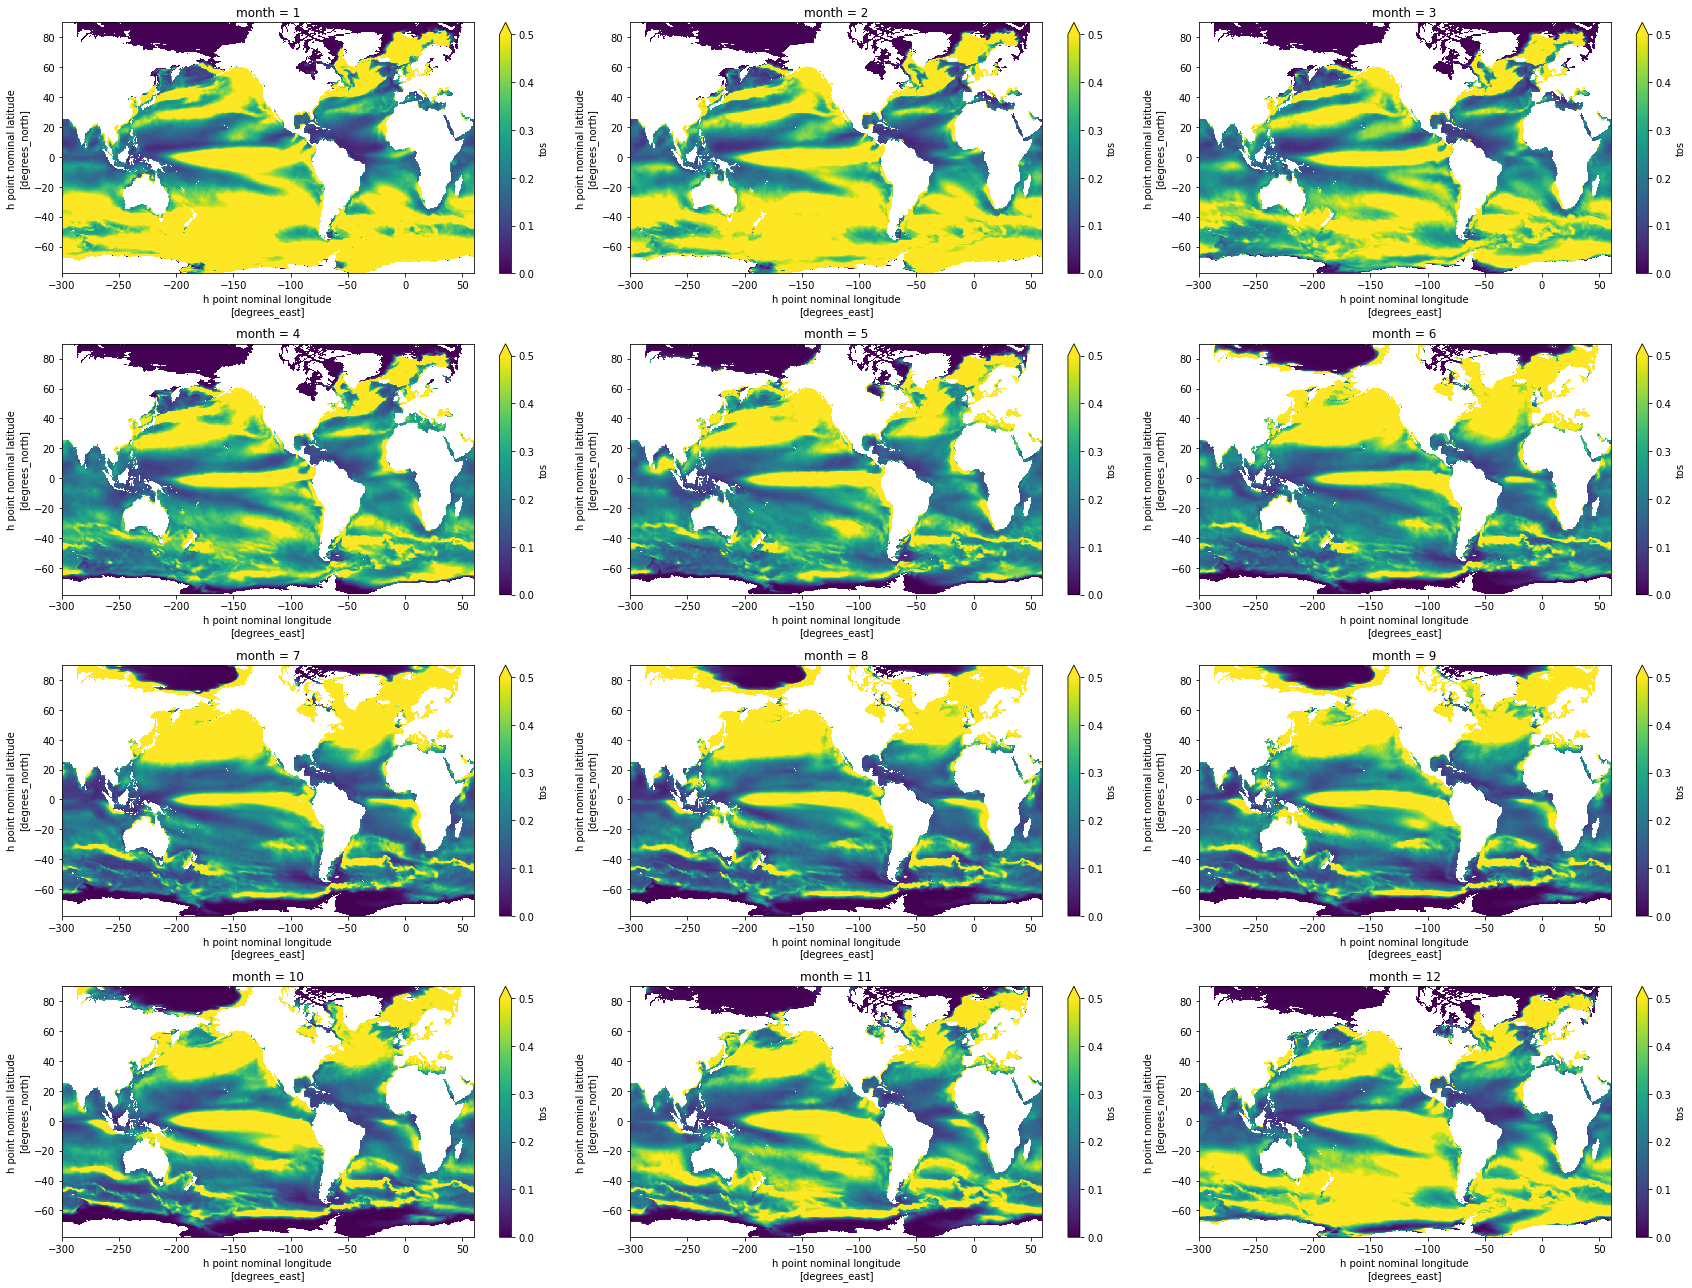

In [12]:
plot_gridlayout(tos_month_var,0,0.5,colormap='viridis')
#plt.savefig('/home/saumyam/Climatologies/SST Variance')